### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data set

In [3]:
df = pd.read_csv('./my_csv.csv', encoding='unicode_escape')

### EDA 

In [4]:
df.head()

,ip,session_id,year,month,date,hour,minute,second,person,bicycle,...,toaster,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush
0,192_168_122_202,2390609618,2025,8,9,8,48,30,0,0,...,0,0,0,0,0,0,0,0,0,0
1,192_168_122_202,2390609618,2025,8,9,8,48,31,4,0,...,0,0,0,0,0,0,0,0,0,0
2,192_168_122_202,2390609618,2025,8,9,8,48,32,4,0,...,0,0,0,0,0,0,0,0,0,0
3,192_168_122_202,2390609618,2025,8,9,8,48,33,0,0,...,0,0,0,0,0,0,0,0,0,0
4,192_168_122_202,2390609618,2025,8,9,8,48,34,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
"""
nan_value = float("NaN")
df.replace(0, nan_value, inplace=True)
df.dropna(how='all', axis=1, inplace=True)
df.replace(nan_value, 0, inplace=True)
"""
len(df.columns)

88

In [6]:
df2=df[['person', 'bicycle', 'car', 'motorcycle', 'airplane',
       'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
       'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
       'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
       'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
       'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
       'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
       'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
       'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
       'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
       'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
       'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
       'scissors', 'teddy bear', 'hair drier', 'toothbrush']]
df['max_feature']=""
max_feature=""
for i in range(len(df2)):
    my_count=0
    #my_count.append(0)
    for j in range(len(df2.columns)):
        #print(f"{i},{j}")
        if df2.iloc[i][j] > my_count:
            my_count=df2.iloc[i][j]
            max_feature=df2.columns[j]
            df.at[i,'max_feature']=max_feature
            #print(f"{j}: {max_feature}: {my_count}",end=", ")
    
    

/tmp/ipykernel_1338215/648475465.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2.iloc[i][j] > my_count:
/tmp/ipykernel_1338215/648475465.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  my_count=df2.iloc[i][j]


In [7]:
#df['max_feature']

In [8]:
df['time']=df['hour']*10000+df['minute']*100+df['second']
len(df.columns)
#df.count(axis=1)

90

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ip              400 non-null    object
 1   session_id      400 non-null    int64 
 2   year            400 non-null    int64 
 3   month           400 non-null    int64 
 4   date            400 non-null    int64 
 5   hour            400 non-null    int64 
 6   minute          400 non-null    int64 
 7   second          400 non-null    int64 
 8   person          400 non-null    int64 
 9   bicycle         400 non-null    int64 
 10  car             400 non-null    int64 
 11  motorcycle      400 non-null    int64 
 12  airplane        400 non-null    int64 
 13  bus             400 non-null    int64 
 14  train           400 non-null    int64 
 15  truck           400 non-null    int64 
 16  boat            400 non-null    int64 
 17  traffic light   400 non-null    int64 
 18  fire hydra

In [10]:
df.describe()

,session_id,year,month,date,hour,minute,second,person,bicycle,car,...,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush,time
count,4.000000e+02,400.0,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.000000
mean,4.682995e+09,2025.0,8.0,9.500000,14.000000,38.230000,32.200000,1.192500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143855.200000
std,1.930478e+09,0.0,0.0,0.500626,6.007514,14.793384,17.545073,1.699312,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60286.920429
min,2.390610e+09,2025.0,8.0,9.000000,8.000000,23.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82330.000000
25%,3.189394e+09,2025.0,8.0,9.000000,8.000000,24.000000,18.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84249.750000
50%,4.460111e+09,2025.0,8.0,9.500000,14.000000,36.500000,34.500000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143666.000000
75%,5.953712e+09,2025.0,8.0,10.000000,20.000000,51.500000,47.000000,2.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203282.250000
max,7.421147e+09,2025.0,8.0,10.000000,20.000000,58.000000,59.000000,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205802.000000


### split the data into X and Y

In [11]:
df.drop(['ip','hour','minute','second','year','date','month'], axis=1,inplace=True)

x=df.drop(['time','max_feature'], axis=1)
y = df['time']

### split the data into train and test set

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### model training

In [13]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### model evaluation

In [14]:
# get the predicted data
y_pred = model.predict(x_test)

# getting the true values
y_true = y_test

In [15]:
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

18846.142204931937

In [16]:
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

471633402.9619399

In [17]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

21717.122345327887

In [18]:
rmse = np.sqrt(mse)
rmse

21717.122345327887

In [19]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2

0.8696110171327736

### model evaluation

In [20]:
# get the predicted data
y_pred = model.predict(x_test)
# getting the true values
y_true = y_test

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root mean squared error (RMSE)
rmse = root_mean_squared_error(y_true, y_pred)

# R-squared score
r2 = r2_score(y_true, y_pred)

print(f"mae: {mae},mse: {mse},rmse: {rmse},r2: {r2}")


mae: 18846.142204931937,mse: 471633402.9619399,rmse: 21717.122345327887,r2: 0.8696110171327736


### result visualization

In [21]:
mean_values = np.ones(y.size) * y.mean()
mean_values

array([143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 143855.2,
       143855.2, 143855.2, 143855.2, 143855.2, 143855.2, 14385

Text(0, 0.5, 'session_id')

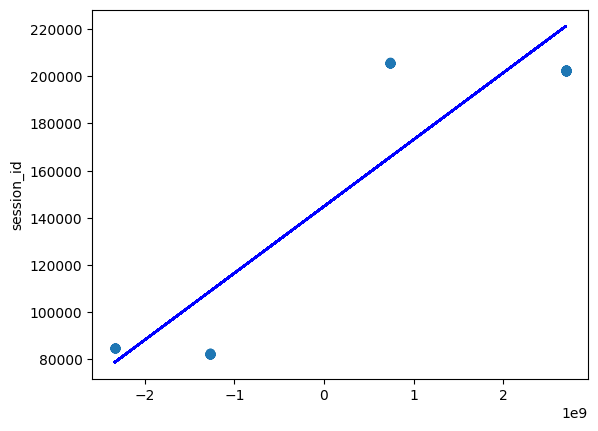

In [22]:
from sklearn.decomposition import PCA

#create pca object
pca = PCA(n_components=1)

x_train_new = pca.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

model_pca = LinearRegression()
model_pca.fit(x_train_new, y_train)

# create new feature for testing
x_test_new = pca.fit_transform(x_test)

plt.scatter(x_test_new, y_test)
plt.plot(x_test_new, model_pca.predict(x_test_new), color='blue')
plt.ylabel('session_id')
#plt.legend()

In [23]:

# convert Categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['max_feature'] = encoder.fit_transform(df['max_feature'])

#df.describe()


x=df.drop(['max_feature'], axis=1)
#x=df[['max_feature','session_id']]
y = df['max_feature']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

from sklearn.linear_model import LinearRegression

# create the model
model2 = LinearRegression()

# train the model
model2.fit(x_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# get the predicted data
y_pred = model2.predict(x_test)

# getting the true values
y_true = y_test

In [25]:
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

0.3647747500811638

In [26]:
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

0.197545271032779

In [27]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

0.444460651838584

In [28]:
rmse = np.sqrt(mse)
rmse

0.444460651838584

In [29]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2

0.6724260821197585

In [30]:
mean_values = np.ones(y.size) * y.mean()
mean_values

array([1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145, 1.145,
       1.145, 1.145,

Text(0, 0.5, 'time')

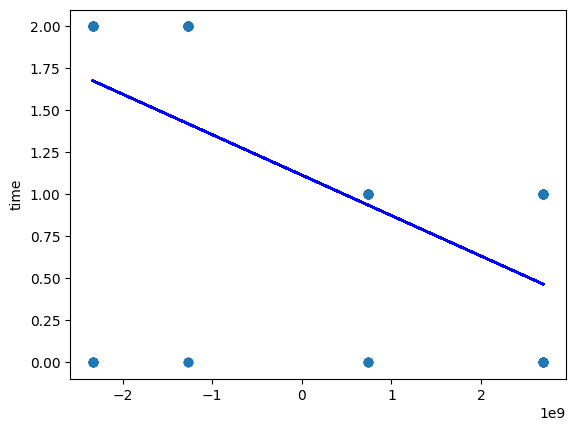

In [31]:
from sklearn.decomposition import PCA

#create pca object
pca = PCA(n_components=1)

x_train_new = pca.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

model_pca = LinearRegression()
model_pca.fit(x_train_new, y_train)

# create new feature for testing
x_test_new = pca.fit_transform(x_test)

plt.scatter(x_test_new, y_test)
plt.plot(x_test_new, model_pca.predict(x_test_new), color='blue')
plt.ylabel('time')
#plt.legend()

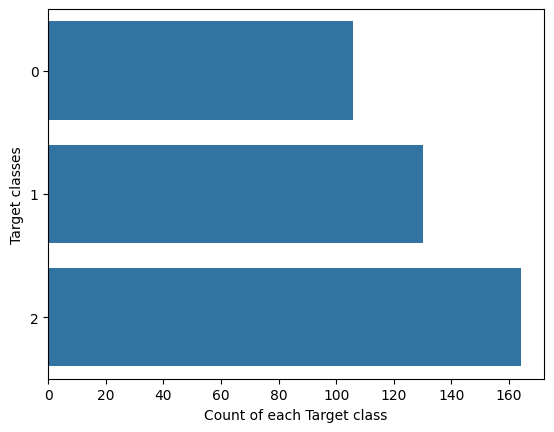

In [32]:
# Check distribution of target class
sns.countplot(y=df['max_feature'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [33]:
y_pred = model_pca.predict([[180000]])
print(y_pred)

[1.11424234]


In [34]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), Lasso(alpha=0.015))

model.fit(x_train, y_train)

print(f"model score on training data: {model.score(x_train, y_train)}")
print(f"model score on testing data: {model.score(x_test, y_test)}")

model score on training data: 0.7076053111270895
model score on testing data: 0.6723012646801408


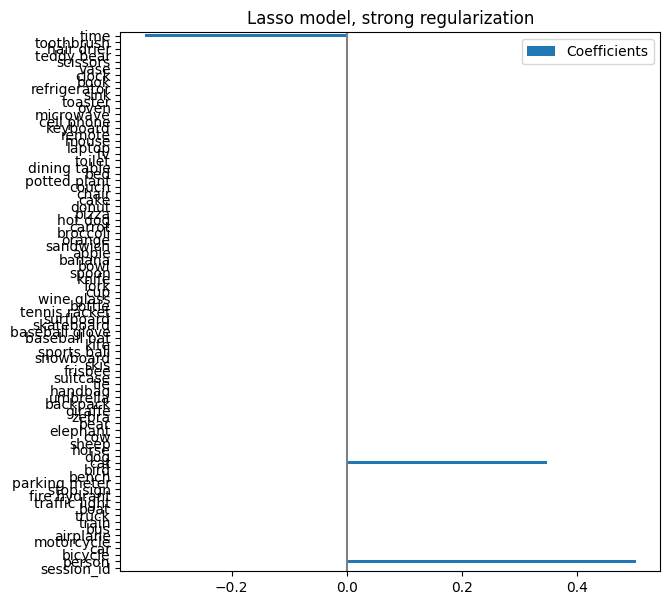

In [35]:
coefs = pd.DataFrame(
    model[1].coef_, columns=["Coefficients"], index=x_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, strong regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

model score on training data: 0.7076067247137922
model score on testing data: 0.672299332262849


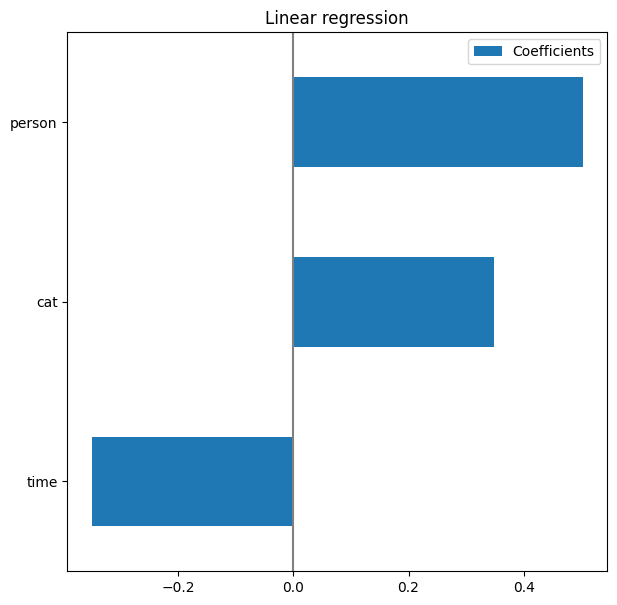

In [36]:
x=df[['time','cat','person']]
#x=df[['max_feature','session_id']]
y = df['max_feature']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

from sklearn.linear_model import LinearRegression

# create the model
model22 = LinearRegression()

# train the model
model.fit(x_train, y_train)
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model22 = make_pipeline(StandardScaler(), Lasso(alpha=0.015))

model22.fit(x_train, y_train)

print(f"model score on training data: {model.score(x_train, y_train)}")
print(f"model score on testing data: {model.score(x_test, y_test)}")

coefs = pd.DataFrame(
    model22[1].coef_, columns=["Coefficients"], index=x_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Linear regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)